In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import tweepy
import time
import json
import random
from tweepy_config import (api_key, api_secret, acc_token, acc_token_secret)

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(acc_token, acc_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [10]:
api_key = api_key
api_secret = api_secret
acc_token = acc_token
acc_token_secret = acc_token_secret

In [11]:
sentiments=[]
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

tweet_data = {
    "tweet_source": [],
    "tweet_text": [],
    "tweet_date": [],
    "tweet_comp_score": [],
    "tweet_neg_score": [],
    "tweet_pos_score": [],
    "tweet_neu_score": []
}

In [12]:
for x in range(1,6):
    target_user = ("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")
    
    for user in target_user:
        public_tweets = api.user_timeline(user, page=x)

        for tweet in public_tweets:
            tweet_data["tweet_source"].append(tweet["user"]["name"])
            tweet_data["tweet_text"].append(tweet["text"])
            tweet_data["tweet_date"].append(tweet["created_at"])
            tweet_data["tweet_comp_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            tweet_data["tweet_neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])
            tweet_data["tweet_pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            tweet_data["tweet_neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])


In [13]:
df_tweets = pd.DataFrame.from_dict(tweet_data)
df_tweets = df_tweets.reset_index()
df_tweets = df_tweets.rename(columns={'index':'tweet_count'})
df_tweets

,tweet_count,tweet_source,tweet_text,tweet_date,tweet_comp_score,tweet_neg_score,tweet_pos_score,tweet_neu_score
0,0,BBC News (World),"Obituary: Shan Tianfang, China's beloved story...",Sat Sep 22 23:11:47 +0000 2018,0.5106,0.000,0.355,0.645
1,1,BBC News (World),RT @BBCSport: Anthony Joshua wins! 🥊\n\nHe’s w...,Sat Sep 22 21:46:36 +0000 2018,0.8395,0.000,0.285,0.715
2,2,BBC News (World),Intruder entered Irish president's house Áras ...,Sat Sep 22 20:47:23 +0000 2018,0.0000,0.000,0.000,1.000
3,3,BBC News (World),Asian rivals eye 'flawed' Maldives poll https:...,Sat Sep 22 20:44:37 +0000 2018,0.0000,0.000,0.000,1.000
4,4,BBC News (World),Kavanaugh accuser 'to testify next week' https...,Sat Sep 22 18:50:08 +0000 2018,0.0000,0.000,0.000,1.000
5,5,BBC News (World),Iran blames Gulf rivals for deadly Ahvaz attac...,Sat Sep 22 17:09:52 +0000 2018,-0.7003,0.453,0.000,0.547
6,6,BBC News (World),Gunmen have opened fire on a military parade i...,Sat Sep 22 16:16:30 +0000 2018,-0.7783,0.312,0.000,0.688
7,7,BBC News (World),A Kenyan judge has lifted a ban on a film abou...,Sat Sep 22 16:07:51 +0000 2018,-0.5574,0.175,0.000,0.825
8,8,BBC News (World),Italy acquits Tunisian 'migrant smuggling' fis...,Sat Sep 22 14:53:45 +0000 2018,-0.4588,0.337,0.120,0.543
9,9,BBC News (World),Bullet train: Hong Kong express rail link laun...,Sat Sep 22 14:43:21 +0000 2018,0.0000,0.000,0.000,1.000


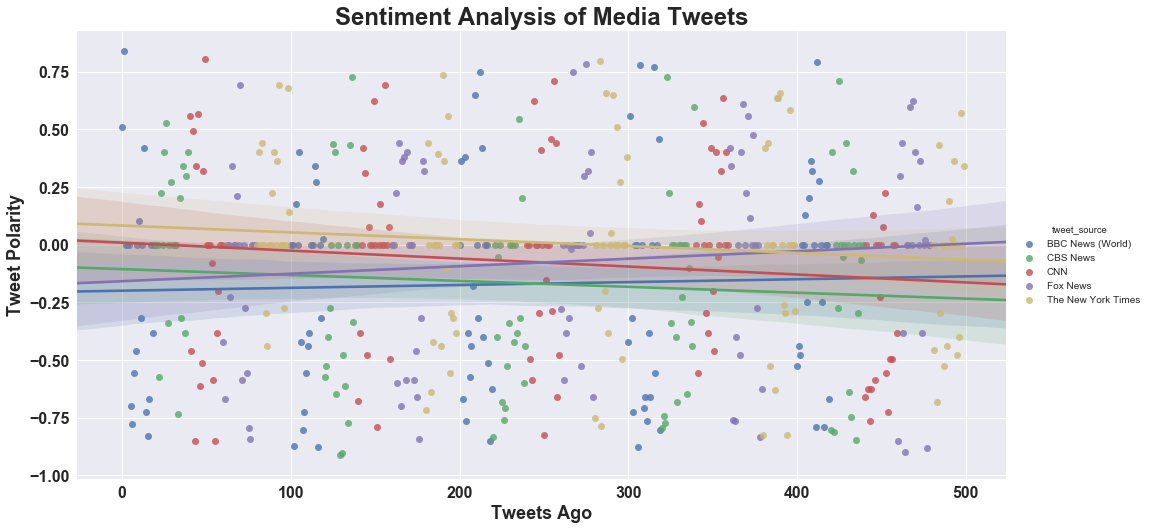

In [18]:
axs = sns.lmplot(x='tweet_count',
            y='tweet_comp_score',
            data=df_tweets,
            size=7,
            aspect=2,
            hue='tweet_source',
            legend=False)
axs.add_legend(label_order=['BBC News (World)','CBS News','CNN','Fox News','The New York Times'])
plt.title('Sentiment Analysis of Media Tweets',fontsize=24,fontweight='bold')
plt.xlabel('Tweets Ago',fontsize=18,fontweight='bold')
plt.ylabel('Tweet Polarity',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
sent_figure = plt.gcf()
plt.show()
sent_figure.savefig('sentiment_analysis.png')

In [19]:
df_tweet_mean = np.round(df_tweets.groupby('tweet_source').mean(),3)
df_tweet_mean = df_tweet_mean.drop(columns=['tweet_count','tweet_neg_score','tweet_neu_score','tweet_pos_score'])
df_tweet_comp = df_tweet_mean.reset_index()
df_tweet_comp

,tweet_source,tweet_comp_score
0,BBC News (World),-0.173
1,CBS News,-0.164
2,CNN,-0.077
3,Fox News,-0.070
4,The New York Times,-0.002


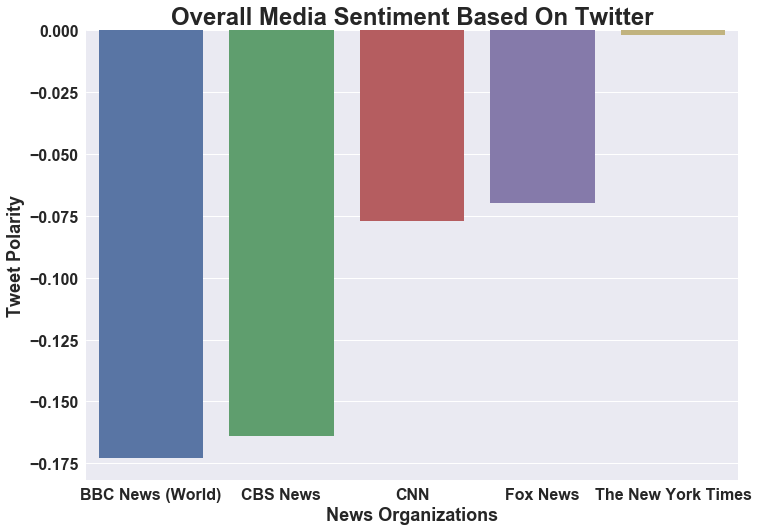

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
axes = sns.barplot(x='tweet_source',
            y='tweet_comp_score',
            data=df_tweet_comp)
plt.title('Overall Media Sentiment Based On Twitter',fontsize=24,fontweight='bold')
plt.xlabel('News Organizations',fontsize=18,fontweight='bold')
plt.ylabel('Tweet Polarity',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
sent_figure2 = plt.gcf()
plt.show()
sent_figure2.savefig('compound_sentiment.png')

In [17]:
df_tweets.to_csv('tweet_data.csv')
